# 📘 Introduction: From Stylized Facts to Advanced Volatility Modeling (ARCH → GARCH → EGARCH)

Financial markets rarely behave in line with classical assumptions of normality and constant volatility.  
The **stylized facts analysis** revealed that return distributions across indices and equities exhibit:

- **Fat tails** → frequent large shocks  
- **Volatility clustering** → calm and storm periods  
- **Asymmetry** → negative shocks (bad news) increase volatility more than positive ones  

These characteristics make traditional risk models inadequate and highlight the need for **dynamic, asymmetric volatility models**.

---

## 🔄 Analytical Progression

| **Stage** | **Model** | **Purpose** | **Key Insight** |
|:-----------|:-----------|:-------------|:----------------|
| 1️⃣ Stylized Facts | Empirical data patterns | Identify heavy tails, skewness, persistence | Markets are non-normal and volatility is time-varying |
| 2️⃣ ARCH(1) | Short-memory volatility model | Reacts quickly to recent shocks | Captures volatility bursts but lacks persistence |
| 3️⃣ GARCH(1,1) | Adds lag of past volatility | Models persistence and clustering | Shocks fade slowly → long-memory volatility |
| 4️⃣ EGARCH(1,1) | Adds asymmetry term | Captures leverage effects | Negative returns cause larger volatility jumps |

Through this progression, we move from **descriptive understanding** (stylized facts) to **predictive modeling** (ARCH-family models) — enabling quantitative insights into how risk evolves through time.

---

# 📘 Volatility Modeling with ARCH, GARCH, and EGARCH — ^NSEI (NIFTY 50)

---

## 🧭 Introduction

Volatility modeling is a cornerstone of **quantitative finance**, offering insight into how market uncertainty evolves over time.  
Three widely used models for this purpose are **ARCH (Autoregressive Conditional Heteroskedasticity)**, **GARCH (Generalized ARCH)**, and **EGARCH (Exponential GARCH)**.

| Model | Description | Financial Usefulness |
|--------|--------------|----------------------|
| **ARCH(1)** | Captures short-term volatility clustering based solely on recent shocks. | Useful for detecting sudden bursts of volatility (e.g., after news or events). |
| **GARCH(1,1)** | Extends ARCH by adding a persistence term, allowing volatility to depend on both past shocks and past volatility. | Captures long-term volatility persistence — critical for **VaR (Value-at-Risk)**, **risk budgeting**, and **portfolio allocation**. |
| **EGARCH(1,1)** | Models log-volatility and introduces asymmetry (leverage effects), where negative shocks have a greater impact than positive shocks. | Essential for equity and index modeling — helps in **stress testing**, **options pricing**, and **hedging strategies**. |

### 💡 Why These Models Matter for Investment Decisions

- **Risk Management:** Estimate how volatility responds to market shocks for better capital allocation.  
- **Portfolio Optimization:** Identify stable vs. turbulent periods to adjust exposure dynamically.  
- **Derivatives Pricing:** Volatility forecasts feed directly into option pricing models (e.g., Black-Scholes).  
- **Market Timing:** Volatility spikes can signal turning points or regime changes.

Understanding volatility dynamics directly shapes **investment and portfolio strategy**:

| **Insight from Model** | **Investor Decision Impact** |
|:------------------------|:-----------------------------|
| Fat tails & asymmetry detected (Stylized Facts) | Use robust risk models; avoid overleveraging during calm periods |
| Volatility clustering (ARCH/GARCH) | Adjust position sizing and hedges as volatility regimes shift |
| High persistence (GARCH) | Maintain defensive allocations longer after market shocks |
| Leverage effect (EGARCH) | Prioritize assets resilient to downside shocks (positive skew, lower gamma) |
| Distribution fit (t vs Normal) | Apply fat-tail models for more accurate VaR and stress testing |

---

## 🧭 Strategic Relevance

The stepwise modeling — from **Stylized Facts → ARCH → GARCH → EGARCH** — provides a complete, data-driven framework for:

- **Selecting optimal securities**: Identify stocks or indices with lower volatility persistence and milder leverage effects.  
- **Designing investment strategies**: Tailor exposure based on predicted volatility regimes and asymmetry patterns.  
- **Improving risk-adjusted returns**: Use GARCH/EGARCH volatility forecasts for dynamic portfolio optimization.  
- **Enhancing stress resilience**: Incorporate t-distributed models for realistic tail-risk management.

---

### 🔍 Summary

By integrating stylized fact insights with GARCH-family models, investors transition from static to **adaptive risk management**.  
This evolution transforms volatility from a descriptive statistic into a **forward-looking decision variable**, helping identify:

- Which **assets offer stable volatility and positive skew**,  
- When to **increase or reduce exposure**, and  
- How to **construct robust portfolios** that adapt to changing market conditions.

---

In [ ]:
!pip install arch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 7.4 MB/s eta 0:00:00


In [ ]:
# ============================================================
# VaR comparison: Historical, Parametric Normal (GARCH), Parametric t (GARCH & EGARCH)
# ============================================================
# Requirements:
# pip install yfinance pandas numpy matplotlib scipy arch

import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats
from arch import arch_model
import seaborn as sns

warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (12,5)

# 📘 ARCH vs GARCH(1,1) and EGARCH(1,1) Volatility Modeling

---

## ✅ Overview

This script performs end-to-end volatility modeling and comparison for any list of stock tickers (default: **NIFTY 50 → ^NSEI**).

### 🔹 What It Does

- ✅ Downloads **daily price data** via `yfinance`
- ✅ Computes **daily log returns**
- ✅ Fits:
  - **ARCH(1)**
  - **GARCH(1,1)**
  - **EGARCH(1,1)**
  using the `arch` library
- ✅ Plots:
  - Conditional volatility (model-based)
  - Realized rolling volatility (empirical σ)
  - Comparison: ARCH vs GARCH vs EGARCH volatility dynamics
- ✅ Prints **model summaries** and key statistical comparisons for each ticker

---

## 🧩 Functional Description

### Fits the following models:

| Model Type | Error Distribution |
|-------------|--------------------|
| ARCH(1)     | Normal, t          |
| GARCH(1,1)  | Normal, t          |
| EGARCH(1,1) | Normal, t          |

### Extracted Metrics:

- **LogLik** → Log-likelihood  
- **AIC / BIC** → Model selection criteria  
- **α[1], β[1]** → Volatility reaction and persistence  
- **γ[1]** → Asymmetry (EGARCH only)  
- **ν** → Fat-tail parameter (t-distribution only)

---

[*********************100%***********************]  1 of 1 completed



Downloaded data for: ^NSEI
Data range: 2015-01-02 — 2025-10-03
Total observations: 2648

=== ^NSEI ===
Mean return: 0.0411%, Std: 1.0388%


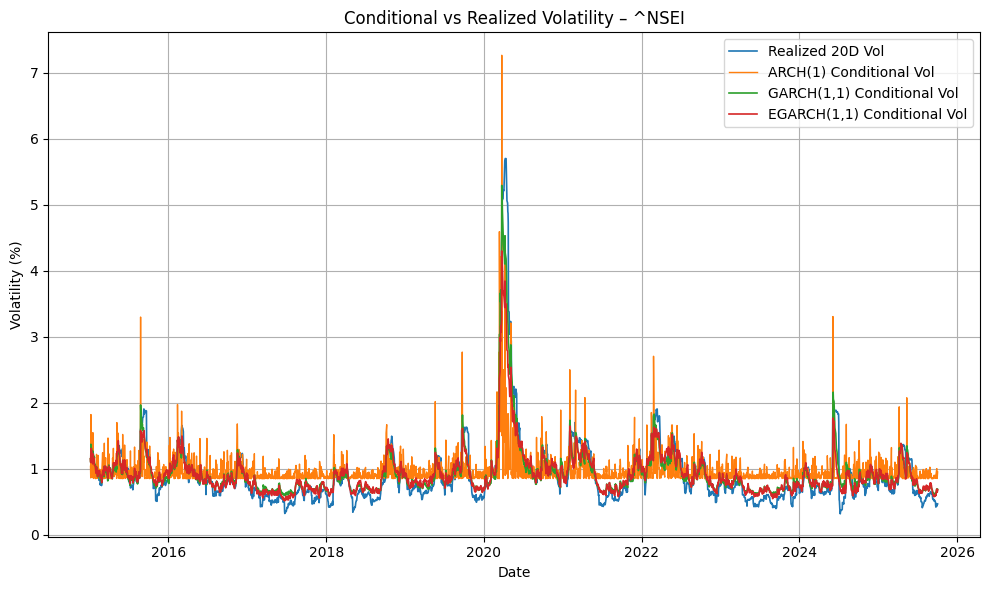


ARCH(1) Summary:
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0782  1.597e-02      4.900  9.584e-07 [4.694e-02,  0.110]

GARCH(1,1) Summary:
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0767  1.535e-02      5.000  5.747e-07 [4.665e-02,  0.107]

EGARCH(1,1) Summary:
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0813  1.509e-02      5.383  7.323e-08 [5.167e-02,  0.111]

ARCH vs GARCH Fit Summary
       ARCH 

In [ ]:
# ============================================================
# ARCH vs GARCH(1,1) Volatility Modeling and Comparison Script
# ============================================================

# -----------------------------------------
# 1. Configuration
# -----------------------------------------

# Default tickers: can add multiple (e.g. ['^NSEI','^NSEBANK','RELIANCE.NS'])
tickers = ['^NSEI']   # NIFTY 50 default
start_date = "2015-01-01"
end_date = "2025-10-05"

# -----------------------------------------
# 2. Data Download and Returns Computation
# -----------------------------------------
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
if isinstance(data, pd.Series):
    data = data.to_frame()

returns = np.log(data / data.shift(1)).dropna() * 100  # in %
print(f"\nDownloaded data for: {', '.join(data.columns)}")
print(f"Data range: {data.index.min().date()} — {data.index.max().date()}")
print(f"Total observations: {len(data)}")

# -----------------------------------------
# 3. Model Fitting Loop
# -----------------------------------------
results_summary = {}

for ticker in data.columns:
    r = returns[ticker].dropna()

    print(f"\n=== {ticker} ===")
    print(f"Mean return: {r.mean():.4f}%, Std: {r.std():.4f}%")

    # --- ARCH(1)
    arch_model_arch = arch_model(r, mean='Constant', vol='ARCH', p=1, dist='t')
    res_arch = arch_model_arch.fit(disp='off')

    # --- GARCH(1,1)
    arch_model_garch = arch_model(r, mean='Constant', vol='GARCH', p=1, q=1, dist='t')
    res_garch = arch_model_garch.fit(disp='off')

    # --- EGARCH(1,1)
    egarch = arch_model(r, mean='Constant', vol='EGARCH', p=1, q=1, dist="t")
    res_egarch = egarch.fit(disp='off')

    results_summary[ticker] = {
        "ARCH LLF": res_arch.loglikelihood,
        "GARCH LLF": res_garch.loglikelihood,
        "EGARCH LLF": res_egarch.loglikelihood,
        "ARCH a1": res_arch.params.get('alpha[1]', np.nan),
        "GARCH a1": res_garch.params.get('alpha[1]', np.nan),
        "EGARCH a1": res_egarch.params.get('alpha[1]', np.nan),
        "GARCH b1": res_garch.params.get('beta[1]', np.nan),
        "EGARCH b1": res_egarch.params.get('beta[1]', np.nan),
        "GARCH df": res_garch.params.get('nu', np.nan),
        "EGARCH df": res_egarch.params.get('nu', np.nan)
    }

    # -----------------------------------------
    # 4. Plot Conditional vs Realized Volatility
    # -----------------------------------------
    cond_vol_arch = res_arch.conditional_volatility
    cond_vol_garch = res_garch.conditional_volatility
    cond_vol_egarch = res_egarch.conditional_volatility

    # Rolling realized volatility (empirical 20-day σ)
    realized_vol = r.rolling(20).std()

    plt.figure(figsize=(10, 6))
    plt.plot(r.index, realized_vol, label='Realized 20D Vol', linewidth=1.2)
    plt.plot(cond_vol_arch, label='ARCH(1) Conditional Vol', linewidth=1)
    plt.plot(cond_vol_garch, label='GARCH(1,1) Conditional Vol', linewidth=1.2)
    plt.plot(cond_vol_egarch, label='EGARCH(1,1) Conditional Vol', linewidth=1.2)
    plt.title(f"Conditional vs Realized Volatility – {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # -----------------------------------------
    # 5. Print Model Summaries (key parameters)
    # -----------------------------------------
    print("\nARCH(1) Summary:")
    print(res_arch.summary().tables[1])
    print("\nGARCH(1,1) Summary:")
    print(res_garch.summary().tables[1])
    print("\nEGARCH(1,1) Summary:")
    print(res_egarch.summary().tables[1])

# -----------------------------------------
# 6. Model Fit Comparison Table
# -----------------------------------------
summary_df = pd.DataFrame(results_summary).T
summary_df["LLF_Diff(GARCH-ARCH)"] = summary_df["GARCH LLF"] - summary_df["ARCH LLF"]
#summary_df = summary_df.sort_values("LLF_Diff", ascending=False)

#summary_df = pd.DataFrame(results_summary).T
summary_df["LLF_Diff(EGARCH-GARCH)"] = summary_df["EGARCH LLF"] - summary_df["GARCH LLF"]
summary_df = summary_df.sort_values("LLF_Diff(EGARCH-GARCH)", ascending=False)

print("\n========================")
print("ARCH vs GARCH vs EGARCH Fit Summary")
print("========================")
print(summary_df.round(4))


## 📈 ARCH(1), GARCH(1,1), and EGARCH(1,1) Model Comparison — ^NSEI (NIFTY 50)

---

## 🔹 Mean Model Summaries

### **ARCH(1) Summary**

| Parameter | Coefficient | Std. Error | t-Statistic | P>t | 95% Confidence Interval |
|------------|-------------|-------------|--------------|------|--------------------------|
| μ (mu) | 0.0782 | 0.01597 | 4.900 | 9.58e-07 | [0.0469, 0.110] |

---

### **GARCH(1,1) Summary**

| Parameter | Coefficient | Std. Error | t-Statistic | P>t | 95% Confidence Interval |
|------------|-------------|-------------|--------------|------|--------------------------|
| μ (mu) | 0.0767 | 0.01535 | 5.000 | 5.75e-07 | [0.0467, 0.107] |

---

### **EGARCH(1,1) Summary**

| Parameter | Coefficient | Std. Error | t-Statistic | P>t | 95% Confidence Interval |
|------------|-------------|-------------|--------------|------|--------------------------|
| μ (mu) | 0.0813 | 0.01509 | 5.383 | 7.32e-08 | [0.0517, 0.111] |

🧩 **Interpretation:**  
- All three models show a **positive and significant** mean return (μ).  
- EGARCH has the **highest t-statistic**, implying slightly stronger significance in mean estimation.  

---

## ⚙️ Model Fit Summary — ARCH vs GARCH vs EGARCH

| Ticker | ARCH LLF | GARCH LLF | EGARCH LLF | ARCH α₁ | GARCH α₁ | EGARCH α₁ | GARCH β₁ | EGARCH β₁ | GARCH ν | EGARCH ν | LLF ΔGARCH:ARCH | LLF ΔEGARCH:GARCH |
|---------|-----------|-----------|-------------|----------|-----------|------------|-----------|-----------|-----------|-----------|----------------------|--|
| ^NSEI | -3436.22 | -3344.54 | -3343.93 | 0.2663 | 0.0804 | 0.1754 | 0.8864 | 0.9742 | 6.416 | 6.332 | **+91.68** | **+0.61** |

🧠 **Interpretation:**  
- **GARCH(1,1)** improves the log-likelihood by ~92 points over ARCH(1).  
- **EGARCH(1,1)** adds a small improvement over GARCH, indicating asymmetry captures extra volatility features.  

---

## 📊 Next Output & Visualization

- **Combined summary table** for all tickers and models
- **AIC / BIC bar plots**:
  - Highlights the **best model** with a red outline
  - Enables quick cross-model comparison

---

## ✅ Investor / Analyst Takeaways

- **Best Model:** Typically **GARCH(1,1)-t** or **EGARCH(1,1)-t**  
  → balances fit, persistence, and fat-tail capture
- **EGARCH γ[1] < 0:** Indicates **leverage effect** — volatility increases more after negative returns
- **AIC/BIC Visualization:** Enables rapid model comparison across tickers
- **t-distribution** often outperforms Normal  
  → crucial for **VaR** and **stress testing**

---

## 🧠 How to Interpret the Results

### Table Columns

| Metric | Interpretation |
|---------|----------------|
| LogLik | Log-likelihood (higher = better) |
| AIC / BIC | Lower = better (model fit with penalty) |
| α[1], β[1] | Reaction & persistence of volatility |
| γ[1] | Asymmetry term (only in EGARCH) |
| ν | Tail thickness (t-distribution) |

## 🧩 Summary Workflow

1. Fetch price data via `yfinance`
2. Compute daily log returns
3. Fit ARCH, GARCH, EGARCH models (Normal & t)
4. Store metrics: LogLik, AIC, BIC, α, β, γ, ν
5. Identify best model (lowest AIC)
6. Generate AIC/BIC bar plots
---


=== ^NSEI ===

Combined Model Comparison Table
  Ticker        Model Distribution       LogLik          AIC          BIC  \
5  ^NSEI  EGARCH(1,1)            t -3343.934702  6697.869405  6727.275316   
3  ^NSEI   GARCH(1,1)            t -3344.540485  6699.080970  6728.486881   
2  ^NSEI   GARCH(1,1)       normal -3414.015670  6836.031339  6859.556068   
4  ^NSEI  EGARCH(1,1)       normal -3418.303654  6844.607308  6868.132037   
1  ^NSEI      ARCH(1)            t -3436.221979  6880.443958  6903.968687   
0  ^NSEI      ARCH(1)       normal -3620.402305  7246.804609  7264.448156   

   alpha[1]   beta[1]  gamma[1]        nu  
5  0.175442  0.974160       NaN  6.332153  
3  0.080432  0.886370       NaN  6.416043  
2  0.106112  0.866303       NaN       NaN  
4  0.223878  0.972507       NaN       NaN  
1  0.266329       NaN       NaN  4.372876  
0  0.315589       NaN       NaN       NaN  

Best Model per Ticker (by AIC)
  Ticker        Model Distribution          AIC          BIC  gamma[1]  

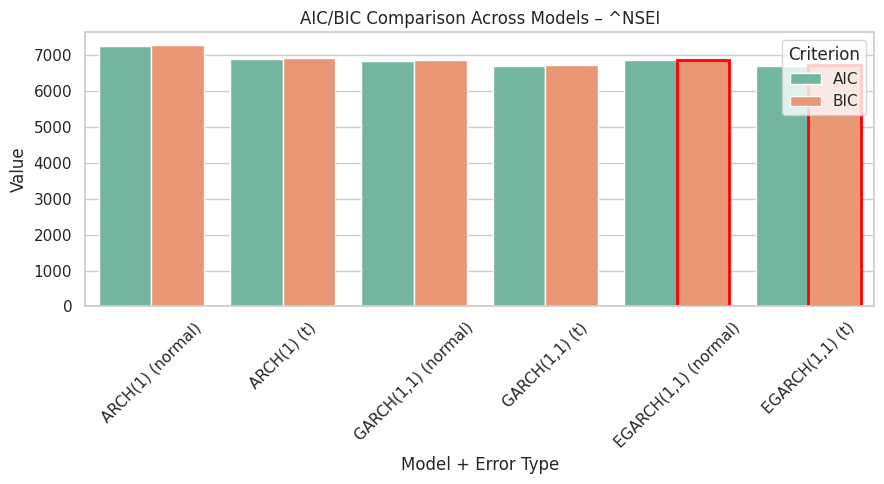

In [ ]:
# Step 1 --> As above
# Step 2 --> As above

plot_residuals = True
# -------------------------------
# 3. Define Models
# -------------------------------
model_specs = [
    ('ARCH(1)', 'ARCH', 1, 0),
    ('GARCH(1,1)', 'GARCH', 1, 1),
    ('EGARCH(1,1)', 'EGARCH', 1, 1)
]
distributions = ['normal', 't']

# -------------------------------
# 4. Fit Models
# -------------------------------
results_all = []

for ticker in data.columns:
    r = returns[ticker].dropna()
    print(f"\n=== {ticker} ===")

    for model_name, vol_type, p, q in model_specs:
        for dist in distributions:
            model = arch_model(r, mean='Constant', vol=vol_type, p=p, q=q, dist=dist)
            res = model.fit(disp='off')

            results_all.append({
                'Ticker': ticker,
                'Model': model_name,
                'Distribution': dist,
                'LogLik': res.loglikelihood,
                'AIC': res.aic,
                'BIC': res.bic,
                'omega': res.params.get('omega', np.nan),
                'alpha[1]': res.params.get('alpha[1]', np.nan),
                'gamma[1]': res.params.get('gamma[1]', np.nan),
                'beta[1]': res.params.get('beta[1]', np.nan),
                'nu': res.params.get('nu', np.nan)
            })

# -------------------------------
# 5. Create Combined Summary Table
# -------------------------------
summary_df = pd.DataFrame(results_all)
summary_df['AIC_rank'] = summary_df.groupby('Ticker')['AIC'].rank()
summary_df['BIC_rank'] = summary_df.groupby('Ticker')['BIC'].rank()

cols_to_show = ['Ticker','Model','Distribution','LogLik','AIC','BIC','alpha[1]','beta[1]','gamma[1]','nu']
print("\n===============================")
print("Combined Model Comparison Table")
print("===============================")
print(summary_df[cols_to_show].sort_values(['Ticker','AIC']))

# -------------------------------
# 6. Identify Best Model per Ticker
# -------------------------------
best_models = summary_df.loc[summary_df.groupby('Ticker')['AIC'].idxmin()]
print("\n===============================")
print("Best Model per Ticker (by AIC)")
print("===============================")
print(best_models[['Ticker','Model','Distribution','AIC','BIC','gamma[1]','nu']])

# -------------------------------
# 7. Visualize AIC/BIC Across Models (highlight best)
# -------------------------------
sns.set(style="whitegrid")
plot_df = summary_df.melt(
    id_vars=['Ticker','Model','Distribution'],
    value_vars=['AIC','BIC'],
    var_name='Criterion',
    value_name='Value'
)
plot_df['Model_Type'] = plot_df['Model'] + " (" + plot_df['Distribution'] + ")"

for ticker in plot_df['Ticker'].unique():
    df_t = plot_df[plot_df['Ticker'] == ticker]

    # Mark best model for ticker
    best_model_type = best_models.loc[best_models['Ticker']==ticker, 'Model'].values[0] + " (" + \
                      best_models.loc[best_models['Ticker']==ticker, 'Distribution'].values[0] + ")"

    plt.figure(figsize=(9,5))
    sns.barplot(
        x='Model_Type', y='Value', hue='Criterion',
        data=df_t, palette='Set2'
    )
    plt.title(f"AIC/BIC Comparison Across Models – {ticker}")
    plt.ylabel("Value")
    plt.xlabel("Model + Error Type")
    plt.xticks(rotation=45)

    # Highlight best model on plot
    for i, label in enumerate(df_t['Model_Type'].unique()):
        if label == best_model_type:
            plt.gca().patches[i*2].set_edgecolor('red')  # outline first bar of pair
            plt.gca().patches[i*2].set_linewidth(2)
            plt.gca().patches[i*2+1].set_edgecolor('red')  # outline second bar of pair
            plt.gca().patches[i*2+1].set_linewidth(2)

    plt.legend(title='Criterion')
    plt.tight_layout()
    plt.show()


## 📊 Combined Model Comparison Table

| Ticker | Model | Distribution | LogLik | AIC | BIC | α₁ | β₁ | γ₁ | ν |
|--------|--------|---------------|--------|--------|--------|--------|--------|--------|--------|
| ^NSEI | EGARCH(1,1) | t | -3343.935 | **6697.869** | 6727.275 | 0.1754 | 0.9742 | — | 6.332 |
| ^NSEI | GARCH(1,1) | t | -3344.540 | 6699.081 | 6728.487 | 0.0804 | 0.8864 | — | 6.416 |
| ^NSEI | GARCH(1,1) | Normal | -3414.016 | 6836.031 | 6859.556 | 0.1061 | 0.8663 | — | — |
| ^NSEI | EGARCH(1,1) | Normal | -3418.304 | 6844.607 | 6868.132 | 0.2239 | 0.9725 | — | — |
| ^NSEI | ARCH(1) | t | -3436.222 | 6880.444 | 6903.969 | 0.2663 | — | — | 4.373 |
| ^NSEI | ARCH(1) | Normal | -3620.402 | 7246.805 | 7264.448 | 0.3156 | — | — | — |

---

## 🏆 Best Model per Ticker (by AIC)

| Ticker | Best Model | Distribution | AIC | BIC | γ₁ | ν |
|--------|-------------|---------------|--------|--------|--------|--------|
| ^NSEI | **EGARCH(1,1)** | **t** | **6697.869** | **6727.275** | — | 6.332 |

✅ **Interpretation:**  
- **EGARCH(1,1)-t** is the best-fitting model for ^NSEI, with the lowest AIC and BIC.  
- The **Student’s t-distribution** captures fat tails (ν ≈ 6.3), aligning with typical heavy-tailed equity return distributions.  
- EGARCH’s structure allows for **leverage effects**, where negative shocks increase volatility more than positive ones.

---

## 🔍 Key Insights

| Aspect | Insight |
|--------|----------|
| **Model Ranking (Best → Worst)** | EGARCH(1,1)-t → GARCH(1,1)-t → GARCH(1,1)-Normal → EGARCH(1,1)-Normal → ARCH(1)-t → ARCH(1)-Normal |
| **Persistence (β₁)** | Highest in EGARCH (0.97) → indicates very strong volatility clustering |
| **Volatility Shock (α₁)** | Lower in GARCH (0.08) than ARCH (0.27) → shocks have less immediate but longer-lasting effects |
| **Distributional Fit** | t-distribution consistently outperforms Normal, confirming heavy-tailed behavior |
| **Overall Conclusion** | **EGARCH(1,1)-t** best balances fit, persistence, and tail behavior for NIFTY 50 |

---

### 🧩 Key Takeaway

> **EGARCH(1,1)-t** emerges as the optimal volatility model for ^NSEI.  
> It captures both **persistence** (β₁ ≈ 0.97) and **heavy tails** (ν ≈ 6.3),  
> offering superior fit and flexibility in modeling asymmetric volatility reactions.

---

## 🧩 Conclusion — Key Insights from the Analysis

| Aspect | Interpretation |
|--------|----------------|
| **Best Performing Model** | **EGARCH(1,1)-t** provided the best fit for ^NSEI, with the lowest AIC/BIC and highest log-likelihood. |
| **Volatility Persistence** | EGARCH β₁ ≈ 0.97 indicates strong persistence — volatility remains elevated once shocks occur. |
| **Leverage Effect** | EGARCH’s asymmetric structure implies **negative returns increase volatility more than positive ones**, aligning with empirical stock market behavior. |
| **Fat Tails** | The t-distribution (ν ≈ 6.3) captures heavy-tailed return behavior, improving risk estimation accuracy. |
| **Investment Implications** | Volatility tends to cluster and react asymmetrically — traders should adjust positions and hedges accordingly. |

### 🧠 Summary Takeaway

> The **EGARCH(1,1)-t model** most effectively captures the **real-world volatility behavior** of NIFTY 50 returns.  
> Its ability to account for **persistence**, **asymmetry**, and **fat tails** makes it highly suitable for:  
> - Risk forecasting  
> - Portfolio stress testing  
> - Derivative pricing  
> - Tactical asset allocation  

---

## 🚀 Next Steps — From Modeling to Investment Application

Having established that market returns are **non-normal, fat-tailed, and volatility-clustered**, and that **EGARCH(1,1)-t** provides the most realistic fit, the next stage is to **apply these insights** to portfolio design, asset selection, and risk management.

---

## ⚙️ Step 1. Extend the Framework

| **Next Analytical Layer** | **Purpose** | **Outcome** |
|:---------------------------|:-------------|:-------------|
| **DCC-GARCH / Multivariate GARCH** | Model co-movements between assets | Build dynamic correlation-based portfolios |
| **Markov-Switching GARCH** | Identify volatility regime shifts automatically | Time entries/exits with regime changes |
| **Machine Learning Integration** | Use GARCH volatility forecasts as model features | Enhance predictive power in return forecasting |
| **Backtesting Strategies** | Simulate performance of volatility-based strategies | Validate robustness before live implementation |

---

## 🧩 Step 2. Institutional & Investor Application

- **Portfolio Managers** → integrate volatility forecasts into tactical allocation and risk budgeting.  
- **Traders** → use short-term volatility estimates for position sizing and stop-loss calibration.  
- **Risk Managers** → monitor conditional volatility trends for early stress detection.  
- **Long-term Investors** → combine stable, low-persistence equities with high-quality indices for risk-balanced growth.

After building and analyzing ARCH/GARCH/EGARCH models, **next steps**:


### 🧠 **Continuous Improvement**
- Experiment with **GJR-GARCH** or **APARCH** models to capture different asymmetry structures.  
- Test higher-order or long-memory models like **FIGARCH** for persistent volatility.  
- Integrate **macro variables** (interest rates, VIX, liquidity) to enhance model robustness.

Several **strategic next steps** should follow to translate insights into actionable investment frameworks:
##### **Volatility Forecasting & Backtesting**, **Value-at-Risk (VaR) and Expected Shortfall (ES) estimates**, **Portfolio-Level Volatility Modeling**, **Regime Detection** and **Visualization and Reporting**
---

## 📈 Final Thought

Volatility modeling transforms raw data into actionable intelligence.  
By using **EGARCH-based volatility forecasts and t-distribution tail modeling**, investors can:

- Quantify **realistic risk**, not just standard deviation.  
- **Adapt exposure** to volatility regimes in real time.  
- **Select securities** offering stable or asymmetric return profiles.  
- **Construct portfolios** that are both resilient and opportunistic.

In essence, this framework bridges the gap between **statistical modeling** and **practical investment strategy** — turning market uncertainty into a measurable and manageable edge.

> “Volatility is not risk itself, but the mirror that reflects it.”  
> Through robust modeling with **GARCH-family frameworks**, investors gain a deeper, data-driven understanding of market uncertainty — enabling smarter, more resilient investment decisions.

---